<a href="https://colab.research.google.com/github/mrmamadi/regression10/blob/dev/Zindi_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 : Importing and Understanding Data


### Importing Libraries

In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing Datasets

In [0]:
df_rider = pd.read_csv('Riders.csv')
df_rider.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
sample = pd.read_csv('SampleSubmission.csv')

In [0]:
sample

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
...,...,...
7063,Order_No_3612,NaN
7064,Order_No_7657,NaN
7065,Order_No_1969,NaN
7066,Order_No_10591,NaN


In [0]:
df_train = pd.read_csv('Train.csv')
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Checking for columns not in test

In [0]:
#checking the length of the train dataset
len(df_train.columns)

29

In [0]:
df_test = pd.read_csv('Test.csv')
#checking the length of the test dataset
len(df_test.columns)

25

In [0]:
#checking for columns that are in train data but not in test data
list(set(list(df_train.columns)) - set(list(df_test.columns)))

['Arrival at Destination - Weekday (Mo = 1)',
 'Arrival at Destination - Day of Month',
 'Time from Pickup to Arrival',
 'Arrival at Destination - Time']

Drop all columns from train that are not in test 

In [0]:
y = df_train['Time from Pickup to Arrival']
df_train.drop(columns=['Arrival at Destination - Weekday (Mo = 1)',
                       'Time from Pickup to Arrival', 
                       'Arrival at Destination - Time',
                       'Arrival at Destination - Day of Month'], inplace = True, axis = 1)

In [0]:
list(set(list(df_train.columns)) - set(list(df_test.columns)))

[]

In [0]:
#To check the information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              21201 non-null  object 
 1   User Id                               21201 non-null  object 
 2   Vehicle Type                          21201 non-null  object 
 3   Platform Type                         21201 non-null  int64  
 4   Personal or Business                  21201 non-null  object 
 5   Placement - Day of Month              21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 7   Placement - Time                      21201 non-null  object 
 8   Confirmation - Day of Month           21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 10  Confirmation - Time                   21201 non-null  object 
 11  Arrival at Pick

In [0]:
#To check descriptive statistics of data frame
df_train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779


In [0]:
#To check the shape of Dataframe
df_train.shape

(21201, 25)

In [0]:
df_train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [0]:
#df_train[df_train.dtypes == 'object']

## Exploratory Data Analysis


### Taking care of Missing Data

In [0]:
#checking for nulls in the dataframe
df_train.isnull().sum()

Order No                                    0
User Id                                     0
Vehicle Type                                0
Platform Type                               0
Personal or Business                        0
Placement - Day of Month                    0
Placement - Weekday (Mo = 1)                0
Placement - Time                            0
Confirmation - Day of Month                 0
Confirmation - Weekday (Mo = 1)             0
Confirmation - Time                         0
Arrival at Pickup - Day of Month            0
Arrival at Pickup - Weekday (Mo = 1)        0
Arrival at Pickup - Time                    0
Pickup - Day of Month                       0
Pickup - Weekday (Mo = 1)                   0
Pickup - Time                               0
Distance (KM)                               0
Temperature                              4366
Precipitation in millimeters            20649
Pickup Lat                                  0
Pickup Long                       

In [0]:
#Total of nulls in the column
df_train['Precipitation in millimeters'].isnull().sum()

20649

In [0]:
len(df_train['Precipitation in millimeters'])

21201

In [0]:
#percentage of precip... in the column
df_train['Precipitation in millimeters'].isnull().sum() / len(df_train['Precipitation in millimeters']) *100

97.39634922880997

In [0]:
df_train['Temperature'].isnull().sum()

4366

In [0]:
len(df_train['Temperature'])

21201

In [0]:
#Percentage of those values that are nulls
df_train['Temperature'].isnull().sum() / len(df_train['Temperature']) *100

20.593368237347295

Dropping Precipitation in millimeters column because it has 97% nulls

In [0]:
df_train.drop('Precipitation in millimeters', inplace=True, axis=1)

In [0]:
df_train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id'],
      dtype='object')

Filled Temperature nulls with mean

In [0]:
df_train['Temperature'] = df_train['Temperature'].fillna(df_train['Temperature'].mean())

In [0]:
df_train['Temperature'].isnull().sum()

0

### Visualizing correlerations

In [0]:
# plt.figure(figsize = (5,4))

# columns = df_train.corr().nlargest(10, 'Time from Pickup to Arrival')['Time from Pickup to Arrival'].index
# corr_matrix = np.corrcoef(df_train[columns].values.T)
# sns.set(font_scale = 1.25)
# corr_matrix
# sns.heatmap(corr_matrix, annot = True, yticklabels = columns.values, fmt='.2f', annot_kws={'size': 5}, xticklabels = columns.values, center = 0.55)
# plt.show()


In [0]:
# df_train['Time from Pickup to Arrival'].value_counts().nlargest(15).plot(kind='bar', figsize=(15,5))
# plt.title("Time from pickup to Arrival")
# plt.ylabel('Time from pick up to arrival')
# plt.xlabel('independent');

In [0]:
# X['Distance (KM)'].hist(bins = 5,color = 'red')
# plt.title("Distance covered (KM)")
# # plt.ylabel('Number of (KM)')
# plt.xlabel('Pickup to Arrival');

## Dealing with Catagorical Variables

In [0]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,9,5,10:27:30 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12,5,11:44:09 AM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,30,2,12:53:03 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,15,5,9:43:06 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,13,1,10:05:23 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770


Dealing with time 

In [0]:
df_train.columns.tolist()

['Order No',
 'User Id',
 'Vehicle Type',
 'Platform Type',
 'Personal or Business',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Placement - Time',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Confirmation - Time',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Arrival at Pickup - Time',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Pickup - Time',
 'Distance (KM)',
 'Temperature',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'Rider Id']

In [0]:
df_train[['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time
0,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM
1,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM
2,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM
3,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM
4,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM


In [0]:
df_train['Placement - AM/PM'] = df_train['Placement - Time'].apply(lambda x: x[-2:])

In [0]:
df_train[['Placement - Time', 'Placement - AM/PM']].head(10)

,Placement - Time,Placement - AM/PM
0,9:35:46 AM,AM
1,11:16:16 AM,AM
2,12:39:25 PM,PM
3,9:25:34 AM,AM
4,9:55:18 AM,AM
5,3:07:35 PM,PM
6,9:33:45 AM,AM
7,2:13:01 PM,PM
8,11:10:44 AM,AM
9,4:48:54 PM,PM


In [0]:
df_train['Confirmation - AM/PM'] = df_train['Confirmation - Time'].apply(lambda x: x[-2:])

In [0]:
df_train[['Confirmation - Time', 'Confirmation - AM/PM']].head(10)

,Confirmation - Time,Confirmation - AM/PM
0,9:40:10 AM,AM
1,11:23:21 AM,AM
2,12:42:44 PM,PM
3,9:26:05 AM,AM
4,9:56:18 AM,AM
5,3:08:57 PM,PM
6,9:49:47 AM,AM
7,2:14:13 PM,PM
8,11:15:49 AM,AM
9,5:17:56 PM,PM


In [0]:
df_train['Arrival at Pickup - AM/PM'] = df_train['Arrival at Pickup - Time'].apply(lambda x: x[-2:])

In [0]:
df_train[['Arrival at Pickup - Time', 'Arrival at Pickup - AM/PM']].head(10)

,Arrival at Pickup - Time,Arrival at Pickup - AM/PM
0,10:04:47 AM,AM
1,11:40:22 AM,AM
2,12:49:34 PM,PM
3,9:37:56 AM,AM
4,10:03:53 AM,AM
5,3:21:36 PM,PM
6,9:53:12 AM,AM
7,2:21:33 PM,PM
8,12:13:18 PM,PM
9,5:32:41 PM,PM


In [0]:
df_train['Pickup - AM/PM'] = df_train['Pickup - Time'].apply(lambda x: x[-2:])

In [0]:
df_train[['Pickup - Time', 'Pickup - AM/PM']].head(10)

,Pickup - Time,Pickup - AM/PM
0,10:27:30 AM,AM
1,11:44:09 AM,AM
2,12:53:03 PM,PM
3,9:43:06 AM,AM
4,10:05:23 AM,AM
5,3:30:30 PM,PM
6,9:56:45 AM,AM
7,2:22:40 PM,PM
8,12:22:57 PM,PM
9,5:34:38 PM,PM


In [0]:
df_train['Placement - Hour'] = df_train['Placement - Time'].apply(lambda x: x[0])

In [0]:
df_train[['Placement - Time', 'Placement - Hour']].head(10)

,Placement - Time,Placement - Hour
0,9:35:46 AM,9
1,11:16:16 AM,1
2,12:39:25 PM,1
3,9:25:34 AM,9
4,9:55:18 AM,9
5,3:07:35 PM,3
6,9:33:45 AM,9
7,2:13:01 PM,2
8,11:10:44 AM,1
9,4:48:54 PM,4


In [0]:
df_train['Confirmation - Hour'] = df_train['Confirmation - Time'].apply(lambda x: x[0])

In [0]:
df_train[['Confirmation - Time', 'Confirmation - Hour']].head(10)

,Confirmation - Time,Confirmation - Hour
0,9:40:10 AM,9
1,11:23:21 AM,1
2,12:42:44 PM,1
3,9:26:05 AM,9
4,9:56:18 AM,9
5,3:08:57 PM,3
6,9:49:47 AM,9
7,2:14:13 PM,2
8,11:15:49 AM,1
9,5:17:56 PM,5


In [0]:
df_train['Arrival at Pickup - Hour'] = df_train['Arrival at Pickup - Time'].apply(lambda x: x[0])

In [0]:
df_train[['Arrival at Pickup - Time', 'Arrival at Pickup - Hour']].head(10)

,Arrival at Pickup - Time,Arrival at Pickup - Hour
0,10:04:47 AM,1
1,11:40:22 AM,1
2,12:49:34 PM,1
3,9:37:56 AM,9
4,10:03:53 AM,1
5,3:21:36 PM,3
6,9:53:12 AM,9
7,2:21:33 PM,2
8,12:13:18 PM,1
9,5:32:41 PM,5


In [0]:
df_train['Pickup - Hour'] = df_train['Pickup - Time'].apply(lambda x: x[0])

In [0]:
df_train[['Pickup - Time', 'Pickup - Hour']].head(10)

,Pickup - Time,Pickup - Hour
0,10:27:30 AM,1
1,11:44:09 AM,1
2,12:53:03 PM,1
3,9:43:06 AM,9
4,10:05:23 AM,1
5,3:30:30 PM,3
6,9:56:45 AM,9
7,2:22:40 PM,2
8,12:22:57 PM,1
9,5:34:38 PM,5


In [0]:
df_train.drop(columns=['Pickup - Time',
                       'Arrival at Pickup - Time',
                       'Confirmation - Time',
                       'Placement - Time'],
                        inplace = True, axis = 1)

Merging Rider and Train

In [0]:
df_train_merge = df_train.merge(df_rider, on='Rider Id')

In [0]:
df_train_merge.drop(['User Id'], inplace = True, axis = 1)

In [0]:
df_train_merge.drop(['Rider Id'], inplace = True, axis = 1)

Exluding Order No for this current Dataset to be merged later on

In [0]:
Order_No = df_train_merge['Order No']
df_train_merge.drop(columns = ['Order No'], inplace = True, axis = 1)

### Encoding Independent Variables

In [0]:
X = pd.get_dummies(df_train_merge, drop_first=True)

In [0]:
X.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),...,Arrival at Pickup - Hour_8,Arrival at Pickup - Hour_9,Pickup - Hour_2,Pickup - Hour_3,Pickup - Hour_4,Pickup - Hour_5,Pickup - Hour_6,Pickup - Hour_7,Pickup - Hour_8,Pickup - Hour_9
0,3,9,5,9,5,9,5,9,5,4,...,0,0,0,0,0,0,0,0,0,0
1,3,18,5,18,5,18,5,18,5,20,...,0,0,0,0,1,0,0,0,0,0
2,3,31,5,31,5,31,5,31,5,6,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2,2,2,2,2,2,2,18,...,0,0,0,0,0,0,0,1,0,0
4,2,22,2,22,2,22,2,22,2,7,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
X.columns

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Personal or Business_Personal', 'Placement - AM/PM_PM',
       'Confirmation - AM/PM_PM', 'Arrival at Pickup - AM/PM_PM',
       'Pickup - AM/PM_PM', 'Placement - Hour_2', 'Placement - Hour_3',
       'Placement - Hour_4', 'Placement - Hour_5', 'Placement - Hour_6',
       'Placement - Hour_7', 'Placement - Hour_8', 'Placement - Hour_9',
       'Confirmation - Hour_2', 'Confirmation - Hour_3',
       'Confirmation - Hour_4', 'Confirmation - Hour_5',
       'Confirmation - Hour_6', 'Confirmation - Hour_7',
 

### Buiding a model


In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

In [0]:
regr_tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [0]:
from sklearn.tree import plot_tree

<IPython.core.display.Javascript object>


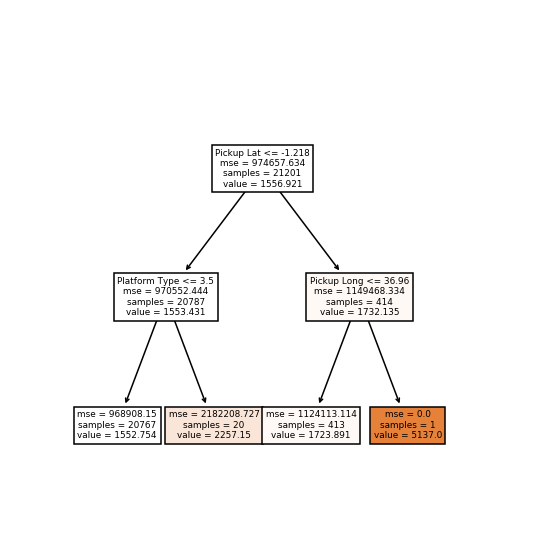

In [0]:
plt.figure(figsize=(5,5))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['Platform Type',
                                        'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Personal or Business_Personal', 'Placement - AM/PM_PM',
       'Confirmation - AM/PM_PM', 'Arrival at Pickup - AM/PM_PM',
       'Pickup - AM/PM_PM', 'Placement - Hour_2', 'Placement - Hour_3',
       'Placement - Hour_4', 'Placement - Hour_5', 'Placement - Hour_6',
       'Placement - Hour_7', 'Placement - Hour_8', 'Placement - Hour_9',
       'Confirmation - Hour_2', 'Confirmation - Hour_3',
       'Confirmation - Hour_4', 'Confirmation - Hour_5',
       'Confirmation - Hour_6', 'Confirmation - Hour_7',
       'Confirmation - Hour_8', 'Confirmation - Hour_9',
       'Arrival at Pickup - Hour_2', 'Arrival at Pickup - Hour_3',
       'Arrival at Pickup - Hour_4', 'Arrival at Pickup - Hour_5',
       'Arrival at Pickup - Hour_6', 'Arrival at Pickup - Hour_7',
       'Arrival at Pickup - Hour_8', 'Arrival at Pickup - Hour_9',
       'Pickup - Hour_2', 'Pickup - Hour_3', 'Pickup - Hour_4',
       'Pickup - Hour_5', 'Pickup - Hour_6', 'Pickup - Hour_7',
       'Pickup - Hour_8', 'Pickup - Hour_9'], filled=True)

### Assessing Model Accuracy

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
# get predictions for test data
y_pred = regr_tree.predict(X_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 985.8307617200308
